In [ ]:
install.packages('GGally')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’





# **Klasyfikacja SVM i wizualizacja**


In [ ]:
library(e1071)
library(ggplot2)
library(gridExtra)

# --- 1. Wczytanie danych ---
wine <- read.csv("wineR3_4.csv")


# Zmiana nazw kolumn (jeśli zawierają '/')
names(wine) <- gsub("/", ".", names(wine))

wine$Class <- as.factor(wine$Class)



## **2. Przygotowanie danych**

In [ ]:
# 4 cechy fizykochemiczne: używaj nazw dokładnie jak w pliku
features_all <- wine[, c("Flavanoids", "Hue", "OD", "Proline")]
labels <- wine$Class

# Dane do wykresów (2D)
features_2D <- wine[, c("Flavanoids", "Hue", "Class")]

# Podział 70/30
set.seed(123)
index <- sample(1:nrow(wine), 0.7 * nrow(wine))
train_all <- features_all[index, ]
test_all <- features_all[-index, ]
train_labels <- labels[index]
test_labels <- labels[-index]

train_2D <- features_2D[index, ]



## **3. Klasyfikacja SVM na 4 cechach**

In [ ]:
kernels <- c("linear", "polynomial", "radial", "sigmoid")

cat("=== DOKŁADNOŚCI KLASYFIKATORA SVM ===\n")
for (k in kernels) {
  cat("\n--- Jądro:", k, "---\n")
  model <- svm(train_all, y = train_labels, kernel = k)
  preds <- predict(model, test_all)
  cm <- table(Prawdziwa = test_labels, Przewidywana = preds)
  print(cm)
  acc <- sum(diag(cm)) / sum(cm)
  cat("Dokładność:", round(acc * 100, 2), "%\n")
}

=== DOKŁADNOŚCI KLASYFIKATORA SVM ===

--- Jądro: linear ---
         Przewidywana
Prawdziwa Low Middle Premium
  Low      11      0       0
  Middle    0     22       2
  Premium   0      0      19
Dokładność: 96.3 %

--- Jądro: polynomial ---
         Przewidywana
Prawdziwa Low Middle Premium
  Low      10      1       0
  Middle    0     24       0
  Premium   0      1      18
Dokładność: 96.3 %

--- Jądro: radial ---
         Przewidywana
Prawdziwa Low Middle Premium
  Low      11      0       0
  Middle    0     21       3
  Premium   0      0      19
Dokładność: 94.44 %

--- Jądro: sigmoid ---
         Przewidywana
Prawdziwa Low Middle Premium
  Low      11      0       0
  Middle    0     23       1
  Premium   0      0      19
Dokładność: 98.15 %


## **4. Wykresy granic decyzyjnych (2 cechy)**

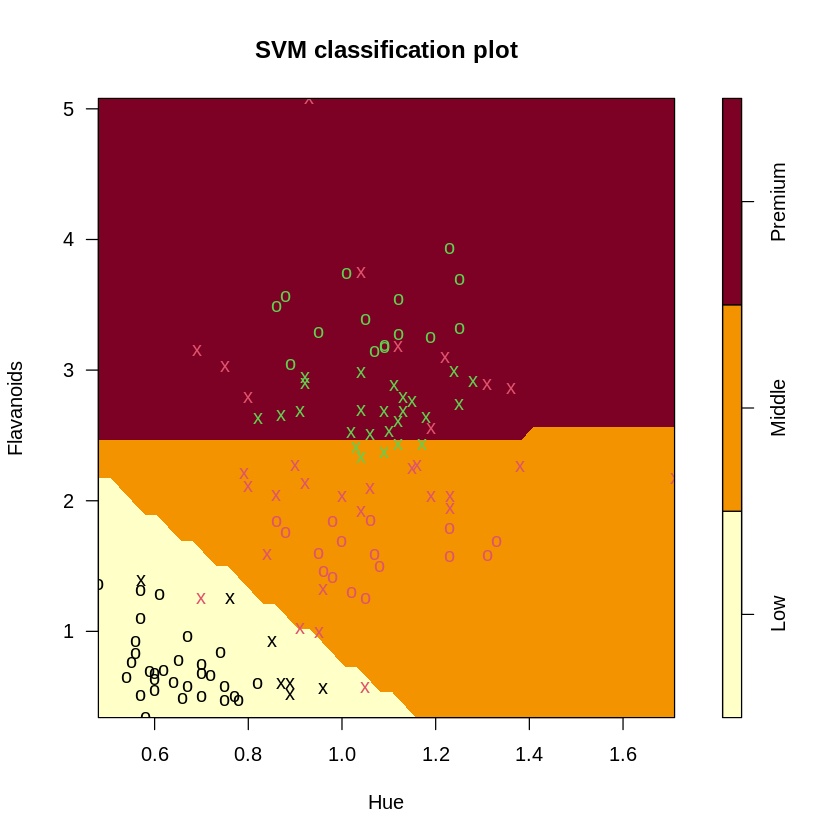

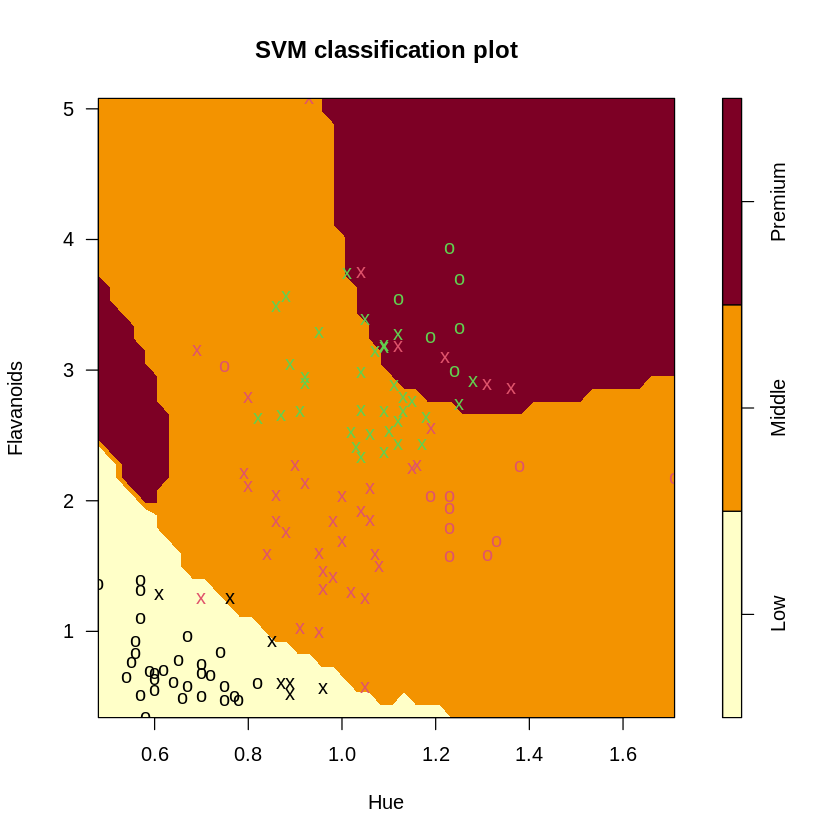

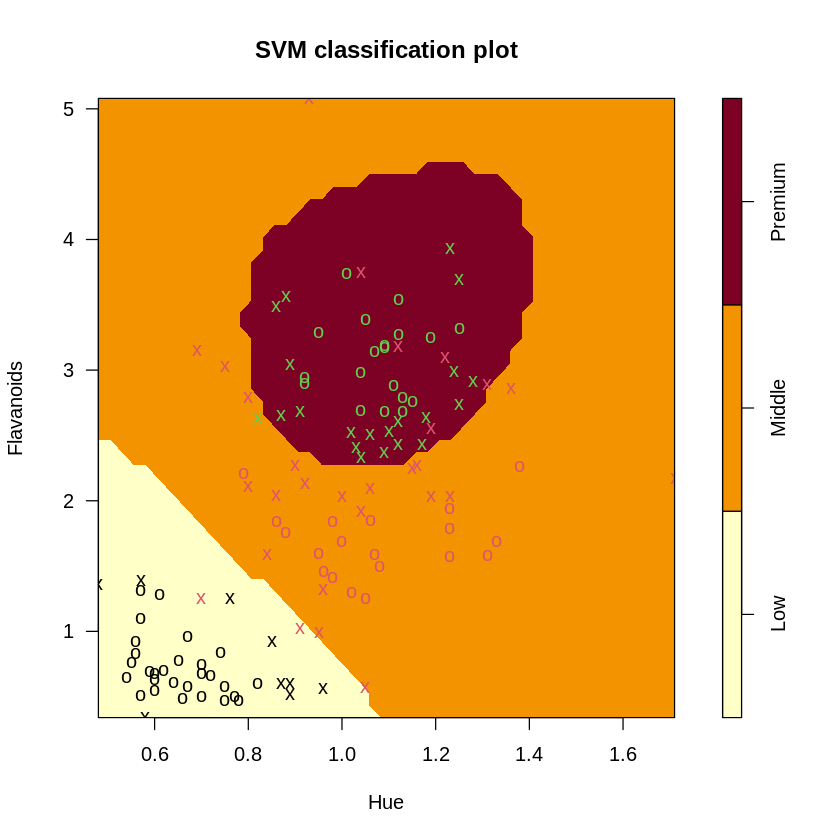

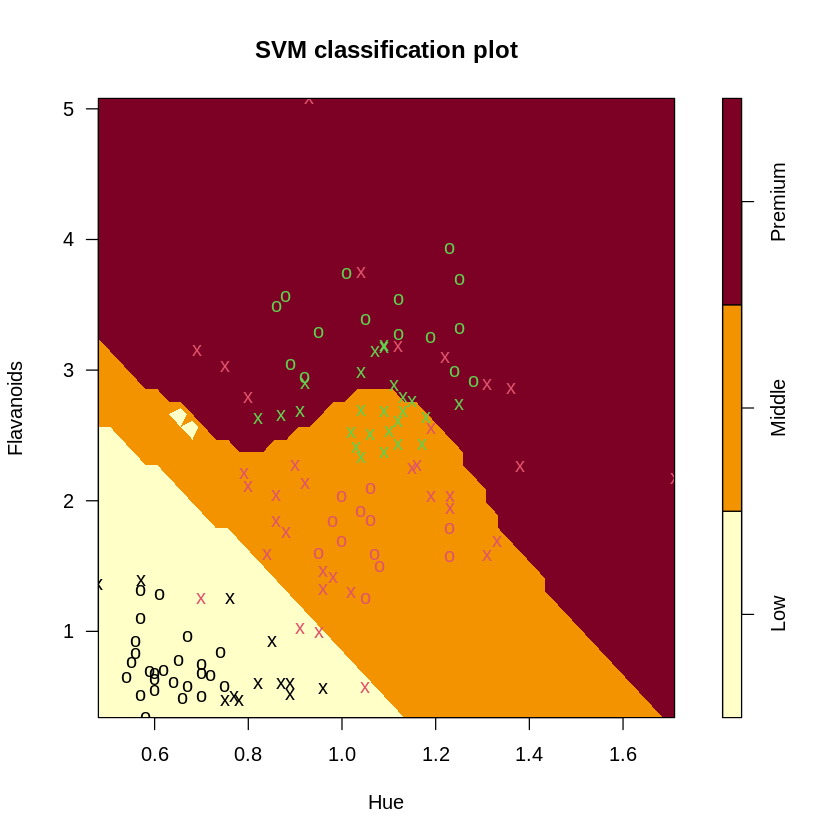

In [ ]:
par(mfrow = c(2, 2))  # 2x2 układ wykresów
for (k in kernels) {
  model <- svm(Class ~ Flavanoids + Hue, data = train_2D, kernel = k)
  plot(model, train_2D, Flavanoids ~ Hue,
       main = paste("SVM granice decyzyjne — kernel:", k))
}

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



=== DOKŁADNOŚCI KLASYFIKATORA SVM ===

--- Jądro: linear ---
         Przewidywana
Prawdziwa Low Middle Premium
  Low      11      0       0
  Middle    0     22       2
  Premium   0      0      19
Dokładność: 96.3 %

--- Jądro: polynomial ---
         Przewidywana
Prawdziwa Low Middle Premium
  Low      10      1       0
  Middle    0     24       0
  Premium   0      1      18
Dokładność: 96.3 %

--- Jądro: radial ---
         Przewidywana
Prawdziwa Low Middle Premium
  Low      11      0       0
  Middle    0     21       3
  Premium   0      0      19
Dokładność: 94.44 %

--- Jądro: sigmoid ---
         Przewidywana
Prawdziwa Low Middle Premium
  Low      11      0       0
  Middle    0     23       1
  Premium   0      0      19
Dokładność: 98.15 %


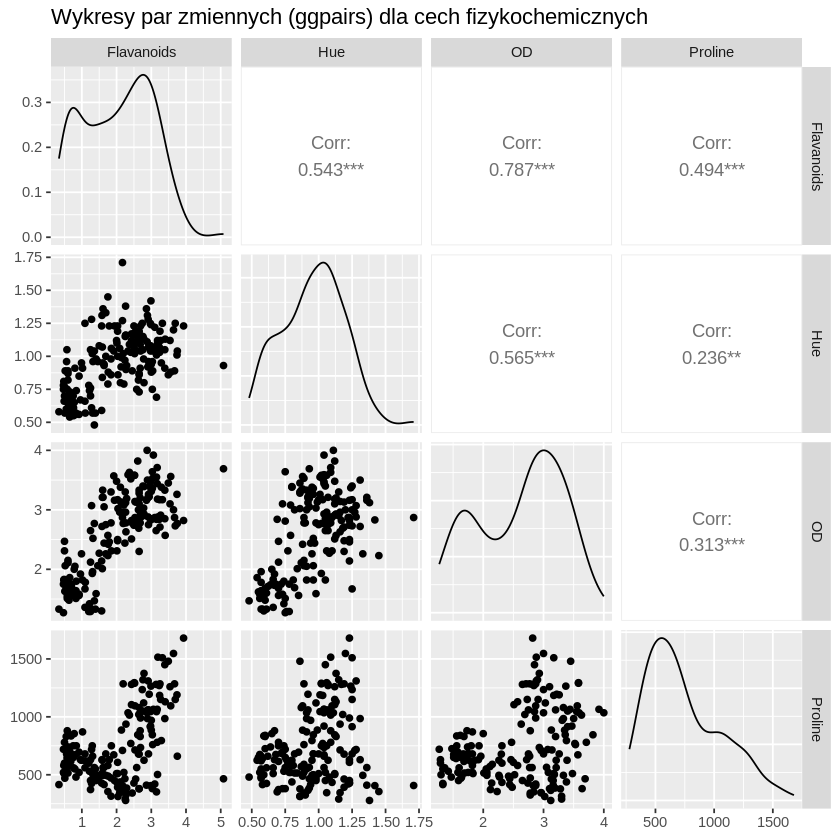

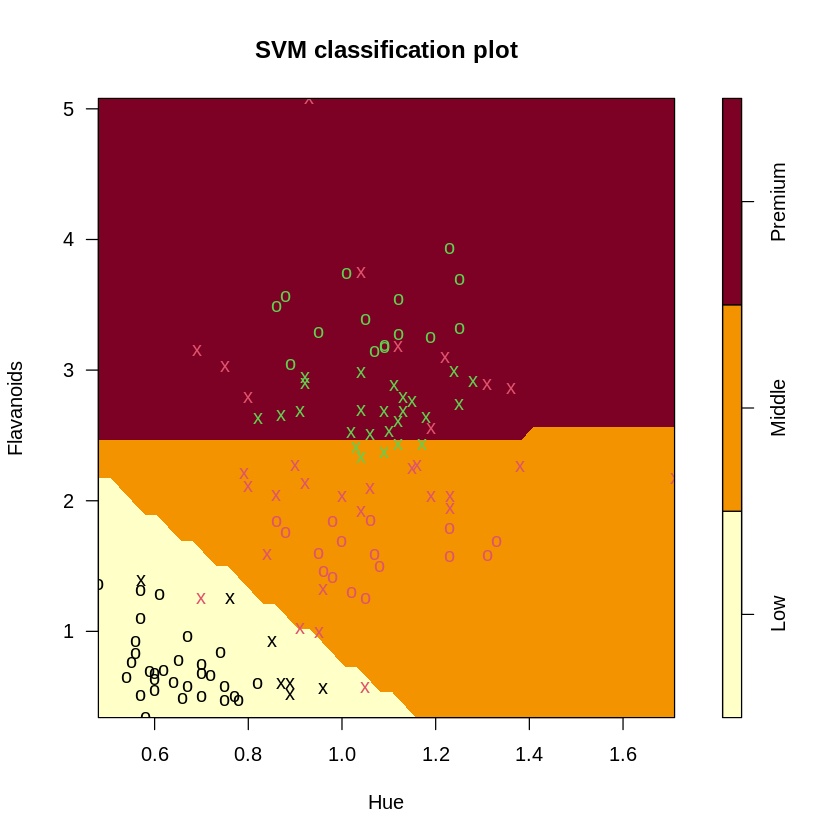

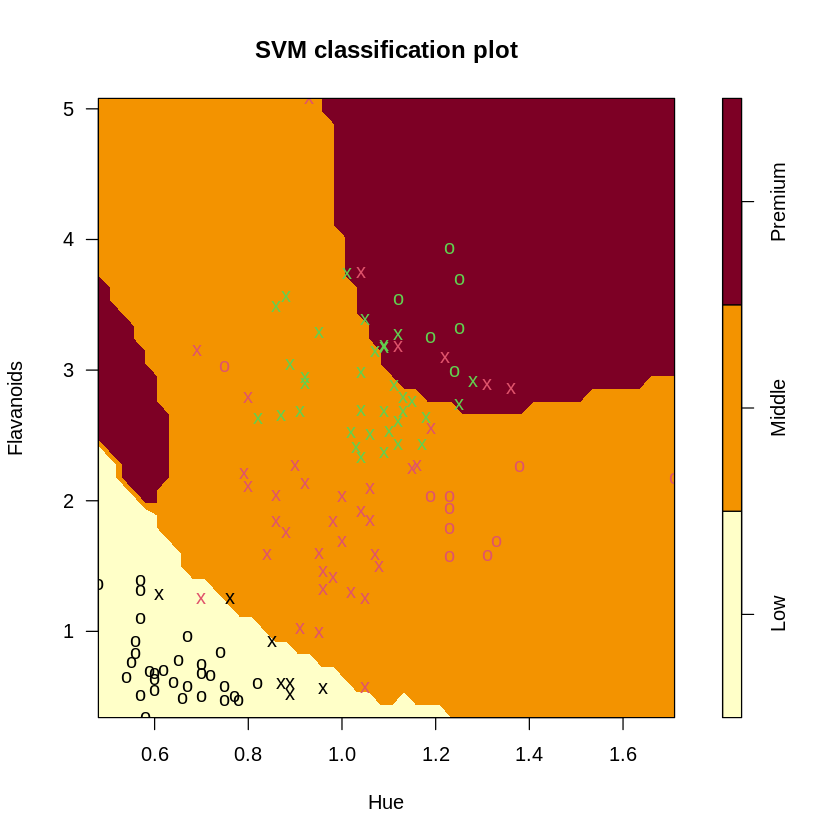

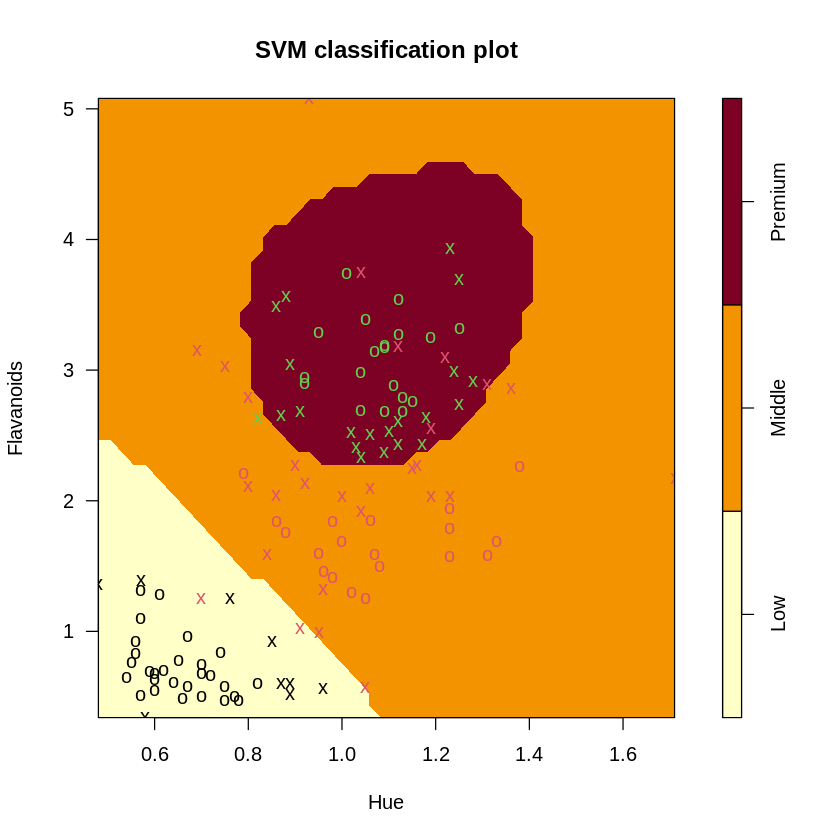

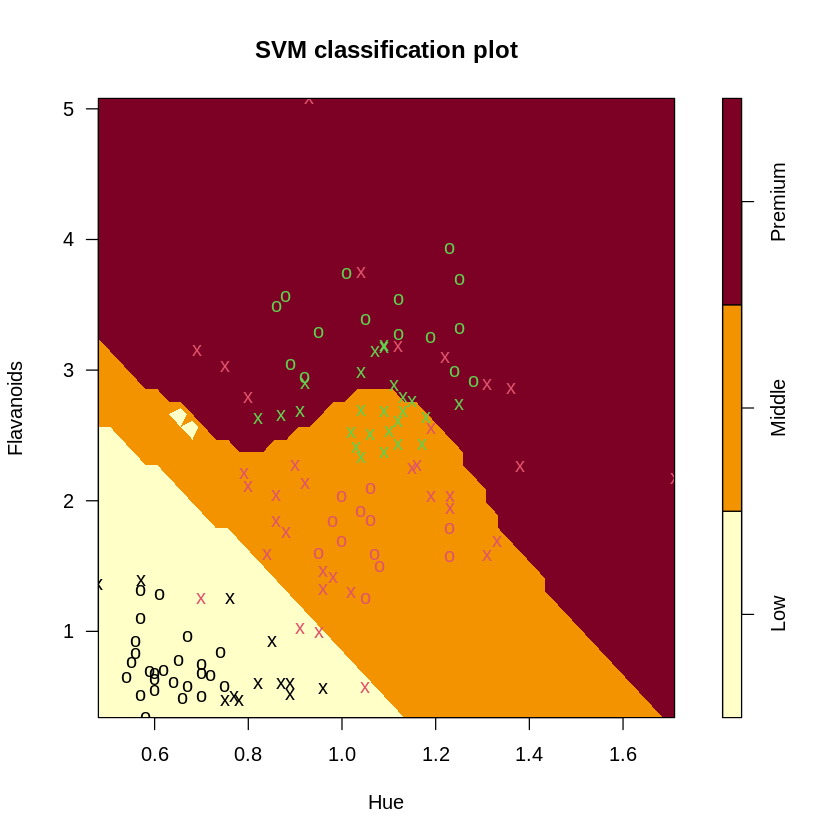

In [ ]:
# ================================
# SVM – klasyfikacja win + wizualizacje
# ================================

library(e1071)
library(GGally)

# --- 1. Wczytanie danych ---
wine <- read.csv("wineR3_4.csv")

# Zmiana nazw kolumn, jeśli zawierają znaki "/"
names(wine) <- gsub("/", ".", names(wine))

# Konwersja kolumny klasy do typu faktor
wine$Class <- as.factor(wine$Class)

# --- 2. Wykresy par zmiennych (ggpairs) ---
# Wybór cech fizykochemicznych
features <- wine[, c("Flavanoids", "Hue", "OD", "Proline")]

# Tworzenie wykresu ggpairs
ggpairs(data = features,
        title = "Wykresy par zmiennych (ggpairs) dla cech fizykochemicznych")

# --- 3. Przygotowanie danych do modelowania ---
# Wybór cech i etykiet
features_all <- wine[, c("Flavanoids", "Hue", "OD", "Proline")]
labels <- wine$Class

# Podział danych na zbiór treningowy i testowy (70/30)
set.seed(123)
index <- sample(1:nrow(wine), 0.7 * nrow(wine))
train_all <- features_all[index, ]
test_all <- features_all[-index, ]
train_labels <- labels[index]
test_labels <- labels[-index]

# Dane do wykresów granic decyzyjnych (2 cechy)
train_2D <- wine[index, c("Flavanoids", "Hue", "Class")]

# --- 4. Trening modeli SVM i ocena dokładności ---
kernels <- c("linear", "polynomial", "radial", "sigmoid")

cat("=== DOKŁADNOŚCI KLASYFIKATORA SVM ===\n")
for (k in kernels) {
  cat("\n--- Jądro:", k, "---\n")
  model <- svm(train_all, y = train_labels, kernel = k)
  preds <- predict(model, test_all)
  cm <- table(Prawdziwa = test_labels, Przewidywana = preds)
  print(cm)
  acc <- sum(diag(cm)) / sum(cm)
  cat("Dokładność:", round(acc * 100, 2), "%\n")
}

# --- 5. Wykresy granic decyzyjnych SVM ---
par(mfrow = c(2, 2))  # Układ 2x2 wykresów
for (k in kernels) {
  model <- svm(Class ~ Flavanoids + Hue, data = train_2D, kernel = k)
  plot(model, train_2D, Flavanoids ~ Hue,
       main = paste("SVM - jądro:", k))
}